In [2]:
import os
#os.chdir('/Users/brettlv/timing_analysis/')

In [ ]:
pyLag

export PYTHONPATH=$PYTHONPATH:/Users/brettlv/timing_analysis/pyLag

In [1]:
from astropy.io import fits 
import pyLag
from pyLag import *

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pylab import cm

%matplotlib inline
%config InlineBackend.figure_format='svg'
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

# test

In [4]:
lc_soft_path='/Volumes/ExtremeSSD/Code_backup/timing_analysis/pyLag/data/pn_lccorr_soft.lc'
lc_hard_path='/Volumes/ExtremeSSD/Code_backup/timing_analysis/pyLag/data/pn_lccorr_hard.lc'

In [5]:
lc_soft=fits.open(lc_soft_path)
lc_hard=fits.open(lc_hard_path)

In [6]:
lc_soft.info()

Filename: /Volumes/ExtremeSSD/Code_backup/timing_analysis/pyLag/data/pn_lccorr_soft.lc
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   ()      
  1  RATE          1 BinTableHDU     79   516R x 6C   [D, E, E, E, E, E]   
  2  SRC_GTIS      1 BinTableHDU     28   30R x 2C   [D, D]   
  3  BKG_GTIS      1 BinTableHDU     28   30R x 2C   [D, D]   
  4  REG00106      1 BinTableHDU     24   1R x 5C   [16A, E, E, E, B]   


In [7]:
lc_soft[1].data.columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 's'
    name = 'RATE'; format = 'E'; unit = 'count/s'
    name = 'ERROR'; format = 'E'; unit = 'count/s'
    name = 'FRACEXP'; format = 'E'; unit = 'fraction'
    name = 'BACKV'; format = 'E'; unit = 'count/s'
    name = 'BACKE'; format = 'E'; unit = 'count/s'
)

In [8]:
lc_soft[1].data['TIME'][-1]-lc_soft[1].data['TIME'][0]

128750.0

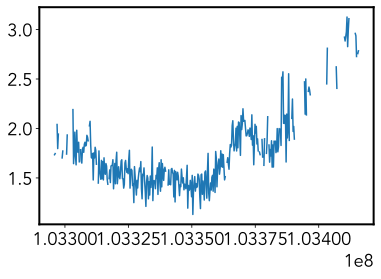

In [9]:
plt.plot(lc_soft[1].data['TIME'],lc_soft[1].data['RATE'])

In [10]:
lc_hard_pylag=lightcurve.LightCurve(filename=lc_hard_path)
lc_soft_pylag=lightcurve.LightCurve(filename=lc_soft_path)

lc1=lc_hard_pylag
lc2=lc_soft_pylag

In [11]:
f1, crossft=cross_spectrum.CrossSpectrum().calculate(lc1=lc1, lc2=lc2)

In [12]:
f1, crossft=cross_spectrum.CrossSpectrum().calculate(lc1=lc1, lc2=lc2,norm=True)

In [13]:
print(min(f1), min(crossft))
print(max(f1), max(crossft))

0.0 (-3.50685-9.780155j)
0.0019922480620155037 (258000.02+0j)


In [14]:
freq, lag=cross_spectrum.CrossSpectrum(lc1=lc1, lc2=lc2,norm=True).lag_spectrum()

/Users/lyubing/opt/anaconda3/lib/python3.9/site-packages/pyLag/cross_spectrum.py:259: RuntimeWarning: invalid value encountered in true_divide
  lag = np.angle(self.crossft) / (2 * np.pi * self.freq)


Text(0, 0.5, 'lag(s)')

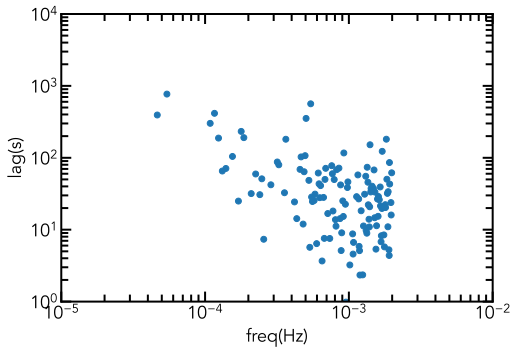

In [15]:
fig = plt.figure(figsize=(6, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])


# Hide the top and right spines of the axis
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)

# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

ax.scatter(freq, lag)
plt.semilogx()
plt.semilogy()
plt.ylim(1.0e0,1.0e4)
plt.xlim(1e-5,1e-2)
plt.xlabel('freq(Hz)')
plt.ylabel('lag(s)')

# Mrk1018

In [16]:
lc_hard_path='/Volumes/ExtremeSSD/Code_backup/timing_analysis/pyLag/data/mrk1018_2018_hard.lc'
lc_soft_path='/Volumes/ExtremeSSD/Code_backup/timing_analysis/pyLag/data/mrk1018_2018_soft.lc'

lc_hard_pylag=lightcurve.LightCurve(filename=lc_hard_path)
lc_soft_pylag=lightcurve.LightCurve(filename=lc_soft_path)

lc1=lc_hard_pylag
lc2=lc_soft_pylag

In [169]:
fits.open(lc_hard_path)[1].data['Time'][-1]-fits.open(lc_hard_path)[1].data['Time'][0]

71500.0

In [170]:
1/71500

1.3986013986013986e-05

In [17]:
bins=binning.LogBinning(1e-5, 1e-2, 10)

Mrk1018_lag_frequency_spectrum=lag_frequency_spectrum.LagFrequencySpectrum(bins,lc1=lc1, lc2=lc2, lc1files=lc_hard_path, lc2files=lc_soft_path,n_samples=5)

lag,lag_error,coh=Mrk1018_lag_frequency_spectrum.calculate(lc1, lc2, bins, calc_error=True)

freq, freq_error=Mrk1018_lag_frequency_spectrum.freq, Mrk1018_lag_frequency_spectrum.freq_error

Text(0.5, 1.0, 'Mrk1018')

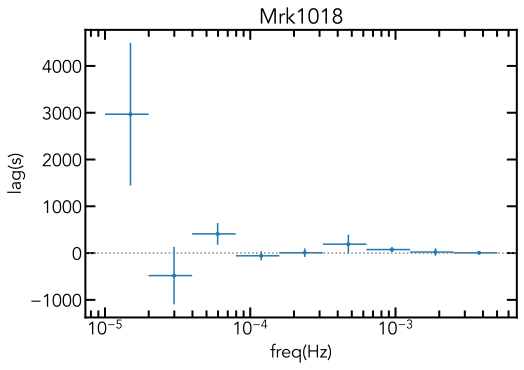

In [18]:
fig = plt.figure(figsize=(6, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])


# Hide the top and right spines of the axis
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)

# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

ax.errorbar(freq,lag,xerr=freq_error,yerr=lag_error,marker='.',ls='')
ax.axhline(0,color='grey',ls=':')
plt.semilogx()
#plt.semilogy()
#plt.ylim(1e-5,1.0e2)
#plt.xlim(1e-5,1e-1)
plt.xlabel('freq(Hz)')
plt.ylabel('lag(s)')
plt.title('Mrk1018')


Text(0.001, -500, 'soft lag')

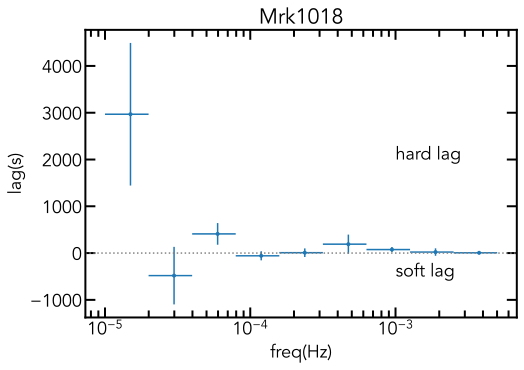

In [19]:
from pyLag import *

lc_hard_path='/Volumes/ExtremeSSD/Code_backup/timing_analysis/pyLag/data/mrk1018_2018_hard.lc'
lc_soft_path='/Volumes/ExtremeSSD/Code_backup/timing_analysis/pyLag/data/mrk1018_2018_soft.lc'

lc_hard_pylag=lightcurve.LightCurve(filename=lc_hard_path)
lc_soft_pylag=lightcurve.LightCurve(filename=lc_soft_path)

lc1=lc_hard_pylag
lc2=lc_soft_pylag

bins=binning.LogBinning(1e-5, 1e-2, 10)

Mrk1018_lag_frequency_spectrum=lag_frequency_spectrum.LagFrequencySpectrum(bins,lc1=lc1, lc2=lc2, lc1files=lc_hard_path, lc2files=lc_soft_path,n_samples=5)

lag,lag_error,coh=Mrk1018_lag_frequency_spectrum.calculate(lc1, lc2, bins, calc_error=True)

freq, freq_error=Mrk1018_lag_frequency_spectrum.freq, Mrk1018_lag_frequency_spectrum.freq_error

fig = plt.figure(figsize=(6, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])


# Hide the top and right spines of the axis
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)

# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

ax.errorbar(freq,lag,xerr=freq_error,yerr=lag_error,marker='.',ls='')
ax.axhline(0,color='grey',ls=':')
plt.semilogx()
#plt.semilogy()
#plt.ylim(1e-5,1.0e2)
#plt.xlim(1e-5,1e-1)
plt.xlabel('freq(Hz)')
plt.ylabel('lag(s)')
plt.title('Mrk1018')
plt.text(1e-3,2000,'hard lag')
plt.text(1e-3,-500,'soft lag')



Text(0.001, -200, 'soft lag')

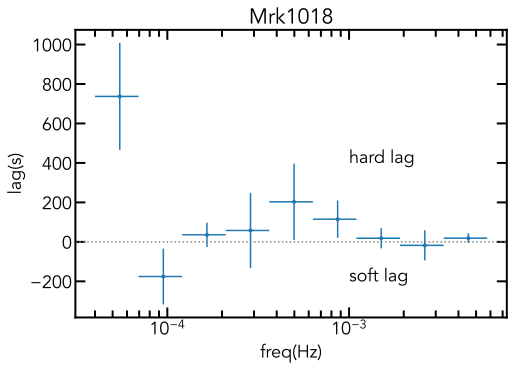

In [20]:
lc_hard_path='/Volumes/ExtremeSSD/Code_backup/timing_analysis/pyLag/data/mrk1018_2018_hard.lc'
lc_soft_path='/Volumes/ExtremeSSD/Code_backup/timing_analysis/pyLag/data/mrk1018_2018_soft.lc'

lc_hard_pylag=lightcurve.LightCurve(filename=lc_hard_path)
lc_soft_pylag=lightcurve.LightCurve(filename=lc_soft_path)

lc1=lc_hard_pylag
lc2=lc_soft_pylag

bins=binning.LogBinning(4e-5, 1e-2, 10)

Mrk1018_lag_frequency_spectrum=lag_frequency_spectrum.LagFrequencySpectrum(bins,lc1=lc1, lc2=lc2, lc1files=lc_hard_path, lc2files=lc_soft_path,n_samples=5)

lag,lag_error,coh=Mrk1018_lag_frequency_spectrum.calculate(lc1, lc2, bins, calc_error=True)

freq, freq_error=Mrk1018_lag_frequency_spectrum.freq, Mrk1018_lag_frequency_spectrum.freq_error

fig = plt.figure(figsize=(6, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])


# Hide the top and right spines of the axis
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)

# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

ax.errorbar(freq,lag,xerr=freq_error,yerr=lag_error,marker='.',ls='')
ax.axhline(0,color='grey',ls=':')
plt.semilogx()
#plt.semilogy()
#plt.ylim(1e-5,1.0e2)
#plt.xlim(1e-5,1e-1)
plt.xlabel('freq(Hz)')
plt.ylabel('lag(s)')
plt.title('Mrk1018')
plt.text(1e-3,400,'hard lag')
plt.text(1e-3,-200,'soft lag')

